In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [2]:
# 파일 다운로드

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-03-26 01:49:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   137MB/s    in 0.5s    

2022-03-26 01:49:03 (137 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):    # 작업 디렉토리는 cats_and_dogs_filtered
    
    shutil.rmtree('/content/cats_and_dogs_filtered/')
    print('/content/cats_and_dogs_filtered/ is removed !!!')

In [4]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/') 

In [5]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

cats_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
dogs_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')
cats_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
dogs_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

print('cats train file nums = ', len(cats_train_list))
print('dogs train file nums = ', len(dogs_train_list))
print('cats validation file nums = ', len(cats_validation_list))
print('dogs validation file nums = ', len(dogs_validation_list))
print('=================================================')

cats train file nums =  1000
dogs train file nums =  1000
cats validation file nums =  500
dogs validation file nums =  500


In [6]:
train_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train'
test_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [7]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

train 디렉토리에서 image data 읽어서 x_train, y_train 생성

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.8)

validation_data_gen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [21]:
train_data = train_data_gen.flow_from_directory(directory=train_dir,
                                  batch_size=32,
                                  color_mode='rgb',
                                  shuffle=True,
                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                  class_mode='sparse',
                                  subset='training')
validation_data = validation_data_gen.flow_from_directory(directory=train_dir,
                                  batch_size=32,
                                  color_mode='rgb',
                                  shuffle=True,
                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                  class_mode='sparse',
                                  subset='validation')
test_data = test_data_gen.flow_from_directory(directory=test_dir,
                                  batch_size=32,
                                  color_mode='rgb',
                                  shuffle=True,
                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                  class_mode='sparse')

print('==========train==========')
print(train_data.class_indices)
print(train_data.num_classes)
print(len(train_data.classes))

print('==========validation==========')
print(validation_data.class_indices)
print(validation_data.num_classes)
print(len(validation_data.classes))

print('==========test==========')
print(test_data.class_indices)
print(test_data.num_classes)
print(len(test_data.classes))

Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
==========train==========
{'cats': 0, 'dogs': 1}
2
400
==========validation==========
{'cats': 0, 'dogs': 1}
2
400
==========test==========
{'cats': 0, 'dogs': 1}
2
1000


## TO-DO

In [23]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet, ResNet50, InceptionV3, Xception

# MobileNet

In [24]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
mobilenet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

## Model summary

In [25]:
model_mobilenet = Sequential()

model_mobilenet.add(mobilenet)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dense(16, activation='relu'))
model_mobilenet.add(Dropout(0.25))
model_mobilenet.add(Dense(2, activation='softmax'))

model_mobilenet.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model_mobilenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 16)                802832    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 4,031,730
Trainable params: 4,009,842
Non-trainable params: 21,888
_________________________________________

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist_mobilenet = model_mobilenet.fit(train_data,
                 epochs=10,
                 validation_data=validation_data)

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
13/13 [==============================] - 23s 744ms/step - loss: 1.2000 - acc: 0.5500 - val_loss: 0.5975 - val_acc: 0.7250
Epoch 2/10
13/13 [==============================] - 9s 682ms/step - loss: 0.6410 - acc: 0.6775 - val_loss: 0.4165 - val_acc: 0.8125
Epoch 3/10
13/13 [==============================] - 9s 724ms/step - loss: 0.4782 - acc: 0.7775 - val_loss: 0.3395 - val_acc: 0.8750
Epoch 4/10
13/13 [==============================] - 9s 715ms/step - loss: 0.4342 - acc: 0.8250 - val_loss: 0.2632 - val_acc: 0.9025
Epoch 5/10
13/13 [==============================] - 9s 667ms/step - loss: 0.3397 - acc: 0.8350 - val_loss: 0.2293 - val_acc: 0.9000
Epoch 6/10
13/13 [==============================] - 9s 667ms/step - loss: 0.3441 - acc: 0.8325 - val_loss: 0.1639 - val_acc: 0.9325
Epoch 7/10
13/13 [==============================] - 9s 696ms/step - loss: 0.2020 - acc: 0.9225 - val_loss: 0.1401 - val_acc: 0.9350
Epoch 8/10
13/13 [==============================] - 9s 687ms/step - loss: 0

## Accuracy

In [27]:
model_mobilenet.evaluate(test_data)

32/32 [==============================] - 5s 140ms/step - loss: 0.0996 - acc: 0.9550


[0.09957803785800934, 0.9549999833106995]

## Graph

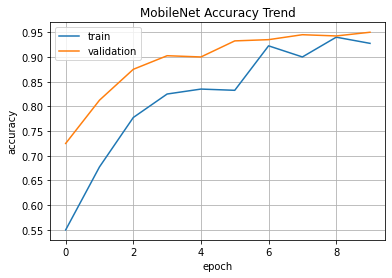

In [28]:
import matplotlib.pyplot as plt

plt.plot(hist_mobilenet.history['acc'], label='train')
plt.plot(hist_mobilenet.history['val_acc'], label='validation')
plt.title('MobileNet Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

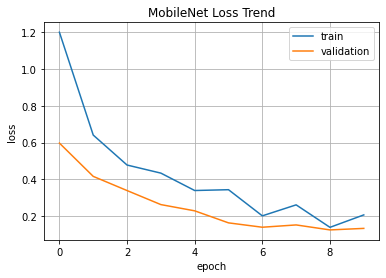

In [29]:
plt.plot(hist_mobilenet.history['loss'], label='train')
plt.plot(hist_mobilenet.history['val_loss'], label='validation')
plt.title('MobileNet Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# Xception

In [30]:
xception = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
xception.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                   

## Model summary

In [31]:
model_xception = Sequential()

model_xception.add(xception)
model_xception.add(Flatten())
model_xception.add(Dense(16, activation='relu'))
model_xception.add(Dropout(0.25))
model_xception.add(Dense(2, activation='softmax'))

model_xception.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model_xception.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 16)                1605648   
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 22,467,162
Trainable params: 22,412,634
Non-trainable params: 54,528
_________________________________________________________________


In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model_xception.fit(train_data,
                 epochs=10,
                 validation_data=validation_data)

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
13/13 [==============================] - 33s 2s/step - loss: 0.6194 - acc: 0.6675 - val_loss: 0.2880 - val_acc: 0.8850
Epoch 2/10
13/13 [==============================] - 21s 2s/step - loss: 0.3633 - acc: 0.8650 - val_loss: 0.1202 - val_acc: 0.9500
Epoch 3/10
13/13 [==============================] - 21s 2s/step - loss: 0.2530 - acc: 0.8975 - val_loss: 0.0918 - val_acc: 0.9600
Epoch 4/10
13/13 [==============================] - 21s 2s/step - loss: 0.1443 - acc: 0.9600 - val_loss: 0.0947 - val_acc: 0.9625
Epoch 5/10
13/13 [==============================] - 21s 2s/step - loss: 0.1330 - acc: 0.9600 - val_loss: 0.0853 - val_acc: 0.9650
Epoch 6/10
13/13 [==============================] - 21s 2s/step - loss: 0.1356 - acc: 0.9500 - val_loss: 0.0866 - val_acc: 0.9700
Epoch 7/10
13/13 [==============================] - 21s 2s/step - loss: 0.0981 - acc: 0.9650 - val_loss: 0.0922 - val_acc: 0.9625
Epoch 8/10
13/13 [==============================] - 21s 2s/step - loss: 0.0806 - acc: 0.97

## Accuracy

In [33]:
model_xception.evaluate(test_data)

32/32 [==============================] - 11s 330ms/step - loss: 0.0506 - acc: 0.9800


[0.050622742623090744, 0.9800000190734863]

## Graph

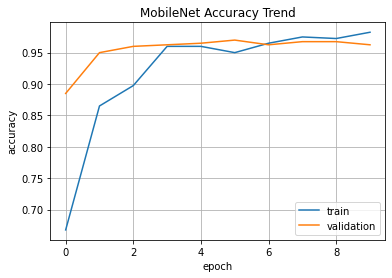

In [34]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('MobileNet Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

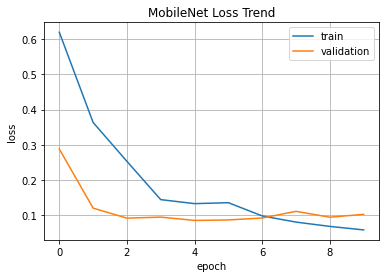

In [35]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('MobileNet Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# 임의의 이미지 넣기

In [40]:
with zipfile.ZipFile('/content/cats_and_dogs_sample.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample') 

In [41]:
import cv2
import glob

test_img_list = []

test_img_name_list = glob.glob('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/*/*.jpg')

for i in range(len(test_img_name_list)):
    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))

    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    dst_img = dst_img / 255.0

    test_img_list.append(dst_img)

print(test_img_name_list)
print(len(test_img_list))

['/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.3.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.4.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.1555.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.6331.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.222.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.123.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.125.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.5411.jpg']
8


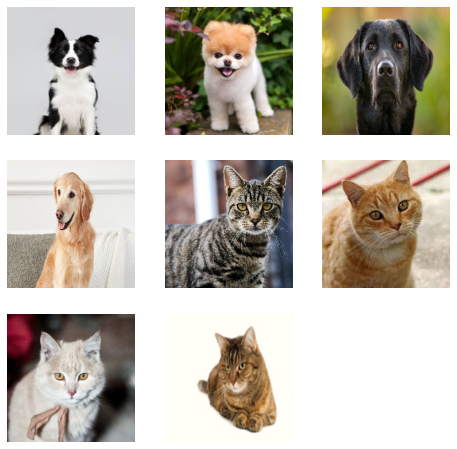

In [42]:
plt.figure(figsize=(8,8))

for i in range(len(test_img_list)):

    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(test_img_list[i])

plt.show()

In [43]:
import numpy as np

x_test = np.array(test_img_list)

In [55]:
class_name = ['cat','dog']

pred = model_mobilenet.predict(x_test)

print(pred.shape)
print(pred)

(8, 2)
[[1.7230108e-01 8.2769895e-01]
 [6.1231792e-01 3.8768208e-01]
 [1.5900228e-02 9.8409975e-01]
 [2.9990755e-04 9.9970007e-01]
 [9.8787814e-01 1.2121849e-02]
 [9.9645621e-01 3.5437220e-03]
 [9.9991369e-01 8.6316555e-05]
 [9.8756826e-01 1.2431816e-02]]


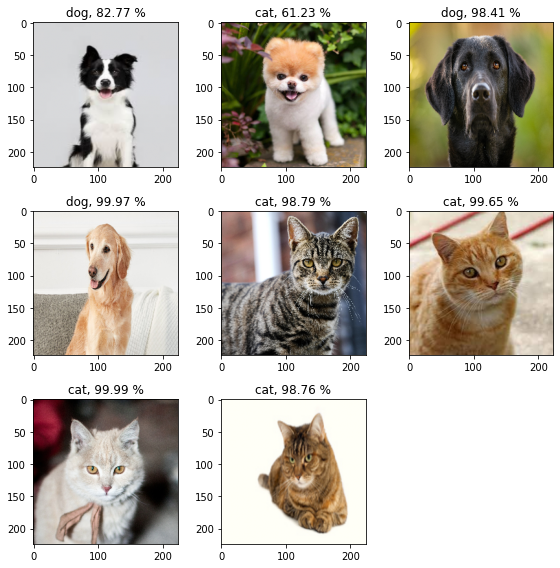

In [57]:
class_name = ['cat','dog']


plt.figure(figsize=(8,8))

for i in range(len(pred)):
    plt.subplot(3,3,i+1)
    plt.xticks()
    plt.yticks()

    prediction = class_name[np.argmax(pred[i])]
    probability = '{0:0.2f}'.format(100*max(pred[i]))
   
    title_str = prediction + ', '+ probability + ' %'
    plt.title(title_str)
    plt.imshow(test_img_list[i])

plt.tight_layout()
plt.show()

In [58]:
class_name = ['cat','dog']

pred = model_xception.predict(x_test)

print(pred.shape)
print(pred)

(8, 2)
[[8.7684290e-03 9.9123150e-01]
 [4.5588394e-03 9.9544120e-01]
 [5.3896743e-04 9.9946100e-01]
 [7.9680991e-05 9.9992037e-01]
 [9.9997211e-01 2.7889957e-05]
 [9.9996471e-01 3.5315003e-05]
 [9.9997211e-01 2.7917873e-05]
 [9.9999833e-01 1.7183520e-06]]


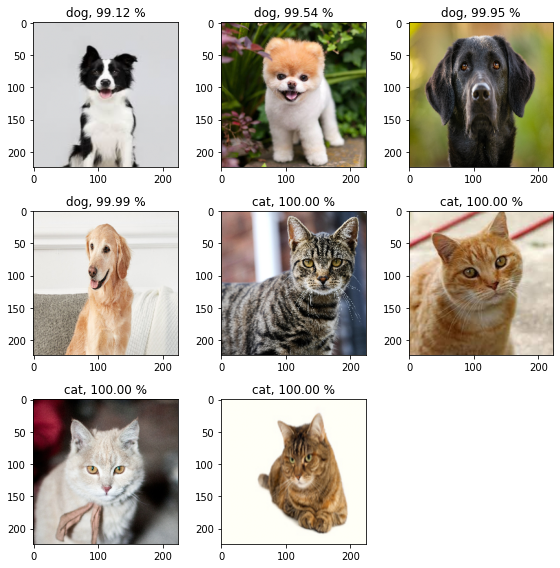

In [60]:
class_name = ['cat','dog']


plt.figure(figsize=(8,8))

for i in range(len(pred)):
    plt.subplot(3,3,i+1)
    plt.xticks()
    plt.yticks()

    prediction = class_name[np.argmax(pred[i])]
    probability = '{0:0.2f}'.format(100*max(pred[i]))
   
    title_str = prediction + ', '+ probability + ' %'
    plt.title(title_str)
    plt.imshow(test_img_list[i])

plt.tight_layout()
plt.show()